In [266]:
#Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data.csv')

In [267]:
# Checking the shape
print(df.shape)

(150, 5)


In [268]:
# Removing the target variable
y = df['species']
df.drop(columns=['species'], inplace=True)

In [269]:
print(df.head)

<bound method NDFrame.head of      Sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>


In [270]:
# Checking distribution for target variable
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [271]:
# Checkingg is normalization is required
df.describe()

,Sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [272]:
# Checking for skewness
df.skew()

Sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [273]:
print(y.unique())

['setosa' 'versicolor' 'virginica']


In [274]:
# Label Encoding the target variable
y = y.replace({'setosa': 0, 'versicolor' : 1, 'virginica': 2})

# Implementing Linear Discriminant Analysis

## Code Implementation

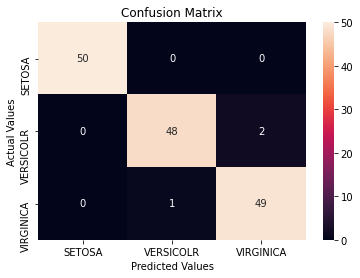

In [275]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict

# Importing libraries for data visualization
from sklearn.metrics import classification_report, plot_confusion_matrix, multilabel_confusion_matrix, accuracy_score

# Importing confusion matrix
from sklearn.metrics import confusion_matrix

clf = LinearDiscriminantAnalysis()
y_pred = cross_val_predict(clf, df, y, cv=5)

# In multilabel confusion matrix MCM , the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1) and false positives is MCM(1,0).
mcm = confusion_matrix(y,y_pred)
cm_df = pd.DataFrame(mcm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [276]:
cm = multilabel_confusion_matrix(y,y_pred)

## Metrics for LDA

In [277]:
# Checking the confusion matrix
print(cm)

[[[100   0]
  [  0  50]]

 [[ 99   1]
  [  2  48]]

 [[ 98   2]
  [  1  49]]]


In [278]:
# Overall metrics
import numpy as np
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calulating the specificity and the sensitivity of each of the classes
res = []
classes = ['setosa', 'versicolor', 'virginica']

y_test=np.array(y)
y_score=np.array(y_pred)

for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    res.append([l,sensitivity, specificity])

f1 = f1_score(y, y_pred, average=None)
    
frame = pd.DataFrame(res, columns = ['class','sensitivity(Recall)','specificity'])
frame['f1score'] = f1
out = y

In [279]:
frame

,class,sensitivity(Recall),specificity,f1score
0,0,1.00,1.00,1.000000
1,1,0.96,0.99,0.969697
2,2,0.98,0.98,0.970297


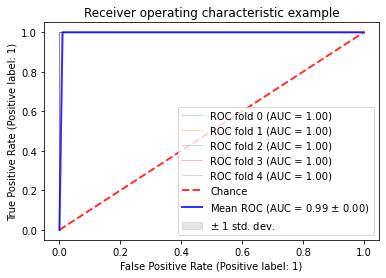

In [280]:
import numpy as np

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

X = df.to_numpy()
y = y.to_numpy()
n_samples, n_features = X.shape

X, y = X[y != 2], y[y != 2]

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = clf

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

# Implementing Quadratic Analysis


## Code Implementation

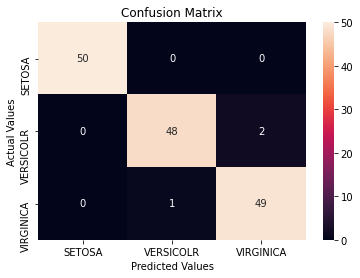

In [281]:
clf = QuadraticDiscriminantAnalysis()
y = out
y_pred = cross_val_predict(clf, df, y, cv=5)

# In multilabel confusion matrix MCM , the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1) and false positives is MCM(1,0).
mcm = confusion_matrix(y,y_pred)
cm_df = pd.DataFrame(mcm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Metrics for Quadratic Discriminant Analysis

In [282]:
# Overall metrics
cm = multilabel_confusion_matrix(y,y_pred)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calulating the specificity and the sensitivity of each of the classes
res = []
classes = ['setosa', 'versicolor', 'virginica']

y_test=np.array(y)
y_score=np.array(y_pred)

for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    res.append([l,sensitivity, specificity])

f1 = f1_score(y, y_pred, average=None)
    
frame = pd.DataFrame(res, columns = ['class','sensitivity(Recall)','specificity'])
frame['f1score'] = f1
out = y

In [283]:
frame

,class,sensitivity(Recall),specificity,f1score
0,0,1.00,1.00,1.000000
1,1,0.96,0.99,0.969697
2,2,0.98,0.98,0.970297


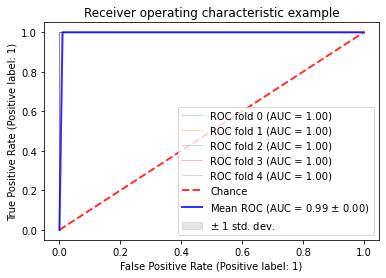

In [284]:
X = df.to_numpy()
y = y.to_numpy()
n_samples, n_features = X.shape

X, y = X[y != 2], y[y != 2]

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = clf

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()